# Overview
- segmentにラベル付けしていくときの管理方法の実験

# Const

# Import everything I need :)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import librosa

/home/user/.local/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


# Function

In [21]:
def feature_extraction(wav):
    feats = librosa.feature.mfcc(wav, sr=sr, n_fft=2048, hop_length=1024, n_mels=12).T
    feat_names = [f'mfcc_{i+1}' for i in range(feats.shape[1])]
    return feats, feat_names

# Prepation

In [8]:
path = librosa.util.example_audio_file()
wav, sr = librosa.load(path, sr=None)

<br>

valilables

In [75]:
df_label = pd.DataFrame({'label_pos': [[1.1, 2.62]], 'class': 'posi'})
df_label

,label_pos,class
0,"[1.1, 2.62]",posi


# Experiment
- セグメントとラベルの管理をシミュレーションしてみる

Text(0.5, 0, 'recording time [sec]')

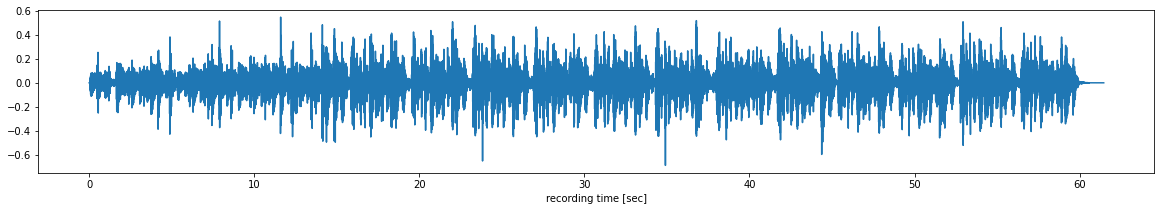

In [26]:
x_sec = (np.arange(0, len(wav))/sr)[::100]
plt.figure(figsize=(20, 3))
plt.plot(x_sec, wav[::100])
plt.xlabel('recording time [sec]')

<br>

1.4 ~ 2.62 秒に最初のラベルを付けたとする

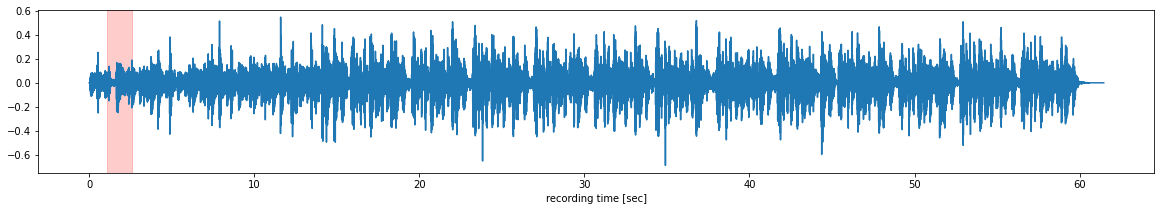

In [76]:
lbl_pos = df_label['label_pos'].values[0]

x_sec = (np.arange(0, len(wav))/sr)[::100]
fig, axs = plt.subplots(figsize=(20, 3))
axs.plot(x_sec, wav[::100])
axs.set_xlabel('recording time [sec]')
axs.axvspan(lbl_pos[0], lbl_pos[1], color='r', alpha=0.2)

<br>

- 1.4~2.62 にposiラベルが振られた。
- なので、2.62-1.1 ~ 1.5 秒のセグメントを作成

In [80]:
seg_len_sec = round(lbl_pos[1]-lbl_pos[0], 1)
seg_len_sec

1.5

<br>

セグメントを図にしてみる

In [88]:
n_seg = int(round(len(wav)/sr/seg_len_sec, 0))
n_seg

41

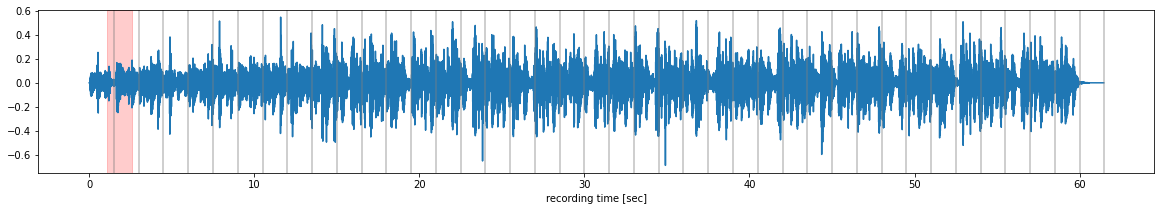

In [89]:
lbl_pos = df_label['label_pos'].values[0]

x_sec = (np.arange(0, len(wav))/sr)[::100]
fig, axs = plt.subplots(figsize=(20, 3))
axs.plot(x_sec, wav[::100])
axs.set_xlabel('recording time [sec]')
axs.axvspan(lbl_pos[0], lbl_pos[1], color='r', alpha=0.2)

# show segment
for i in range(n_seg):
    seg_end = (i + 1) * seg_len_sec
    axs.axvline(seg_end, color='gray', alpha=0.5)

--> 赤い領域は、posiクラスとなる。  
--> 赤い領域とかぶっている部分はあまりの部分だけで特徴量を作成する